# Refactor the code below (5 corrections)

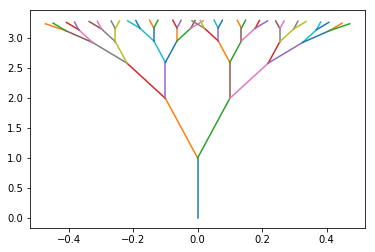

In [1]:
%matplotlib inline

from math import sin, cos
from matplotlib import pyplot as plt

s=1 #
d=[[0,1,0]]
plt.plot([0,0],[0,1])
for i in range(5): #
    n=[]
    for j in range(len(d)):  #
        n.append([d[j][0]+s*sin(d[j][2]-0.1), d[j][1]+s*cos(d[j][2]-0.1), d[j][2]-0.1]) ##
        n.append([d[j][0]+s*sin(d[j][2]+0.1), d[j][1]+s*cos(d[j][2]+0.1), d[j][2]+0.1])
        plt.plot([d[j][0], n[-2][0]],[d[j][1], n[-2][1]])
        plt.plot([d[j][0], n[-1][0]],[d[j][1], n[-1][1]])
    d=n
    s*=0.6
plt.savefig('tree.png')

## Refactor 

1. Replace with variables

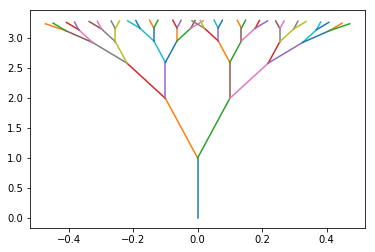

In [3]:
%matplotlib inline

from math import sin, cos
from matplotlib import pyplot as plt

s=1
d=[[0,1,0]]

plt.plot([0,0],[0,1])
for i in range(5):
    n=[]
    for j in range(len(d)):
        x=d[j][0]
        y=d[j][1]
        angle=d[j][2]
        
        n.append([x+s*sin(angle-0.1), y+s*cos(angle-0.1), angle-0.1])
        n.append([x+s*sin(angle+0.1), y+s*cos(angle+0.1), angle+0.1])
        plt.plot([x, n[-2][0]],[y, n[-2][1]])
        plt.plot([x, n[-1][0]],[y, n[-1][1]])
    d=n
    s*=0.6 
plt.savefig('tree.png')

2. Replace magic numbers with constants

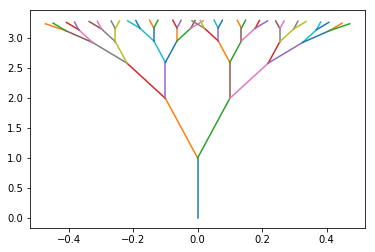

In [4]:
%matplotlib inline

from math import sin, cos
from matplotlib import pyplot as plt

s=1
d=[[0,1,0]]
increment=0.1
scale_resize=0.6

plt.plot([0,0],[0,1])
for i in range(5):
    n=[]
    for j in range(len(d)):
        x=d[j][0]
        y=d[j][1]
        angle=d[j][2]
        
        n.append([x+s*sin(angle-increment), y+s*cos(angle-increment), angle-increment])
        n.append([x+s*sin(angle+increment), y+s*cos(angle+increment), angle+increment])
        plt.plot([x, n[-2][0]],[y, n[-2][1]])
        plt.plot([x, n[-1][0]],[y, n[-1][1]])
    d=n
    s*=scale_resize #

3. Change variables name

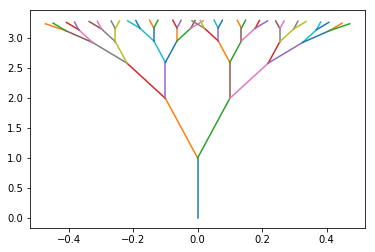

In [4]:
%matplotlib inline

from math import sin, cos
from matplotlib import pyplot as plt

length=1
initial_point=[[0,1,0]]
change_in_angle=0.1
length_rescale=0.6
generation = 5

plt.plot([0,0],[0,1])
for i in range(generation):
    new_point=[]
    for j in range(len(initial_point)):
        x=initial_point[j][0]
        y=initial_point[j][1]
        angle=initial_point[j][2]
        
        new_point.append([x+length*sin(angle-change_in_angle), y+length*cos(angle-change_in_angle), 
        angle-change_in_angle])

        new_point.append([x+length*sin(angle+change_in_angle), y+length*cos(angle+change_in_angle), 
        angle+change_in_angle])

        plt.plot([x, new_point[-2][0]],[y, new_point[-2][1]])
        plt.plot([x, new_point[-1][0]],[y, new_point[-1][1]])

    initial_point=new_point
    length*=length_rescale
plt.savefig('tree.png')

4. Replace reapeated code with a function

Got error at first for no adding new_point as a argument for the tree_branch and other functions. Always check you are inputting the right arguments!

In [5]:
%matplotlib inline

from math import sin, cos
from matplotlib import pyplot as plt


def plots(x,y,new_point):
    plt.plot([0,0],[0,1])
    plt.plot([x, new_point[-2][0]],[y, new_point[-2][1]])
    plt.plot([x, new_point[-1][0]],[y, new_point[-1][1]])
    plt.savefig('tree.png')
    
def new_points(x,y,angle,length,change_in_angle,new_point):        
    new_point.append([x+length*sin(angle-change_in_angle), y+length*cos(angle-change_in_angle), 
    angle-change_in_angle])
    new_point.append([x+length*sin(angle+change_in_angle), y+length*cos(angle+change_in_angle), 
    angle+change_in_angle])
    
def tree_branch(initial_point,length,change_in_angle,new_point):
    for j in range(len(initial_point)):
        x=initial_point[j][0]
        y=initial_point[j][1]
        angle=initial_point[j][2]
        new_points(x,y,angle,length,change_in_angle,new_point)        
        plots(x,y,new_point)

def tree(generation=5,change_in_angle=0.1,length_rescale=0.6,length=1):        
    initial_point=[[0,1,0]]
    while (generation!=0):
        new_point=[]
        tree_branch(initial_point,length,change_in_angle,new_point)
        initial_point=new_point
        length*=length_rescale
        generation -=1

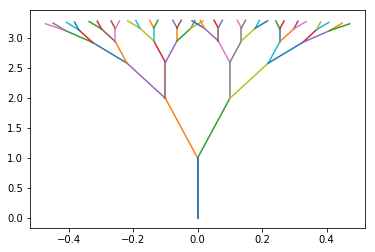

In [6]:
tree()

5. Remove the range in second loop and reduced line there. j in range of initial_point instead of len(initial_point)

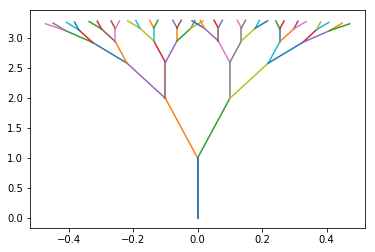

In [7]:
%matplotlib inline

from math import sin, cos
from matplotlib import pyplot as plt


def plots(x,y,new_point):
    plt.plot([0,0],[0,1])
    plt.plot([x, new_point[-2][0]],[y, new_point[-2][1]])
    plt.plot([x, new_point[-1][0]],[y, new_point[-1][1]])
    plt.savefig('tree.png')
    
def new_points(x,y,angle,length,change_in_angle,new_point):        
    new_point.append([x+length*sin(angle-change_in_angle), y+length*cos(angle-change_in_angle), 
    angle-change_in_angle])
    new_point.append([x+length*sin(angle+change_in_angle), y+length*cos(angle+change_in_angle), 
    angle+change_in_angle])
    
def tree_branch(initial_point,length,change_in_angle,new_point,plot=True):
    for j in initial_point:
        x,y,angle=j
        new_points(x,y,angle,length,change_in_angle,new_point) 
        if plot:
            plots(x,y,new_point)

def tree(generation=5,change_in_angle=0.1,length_rescale=0.6,length=1,plot=True):        
    initial_point=[[0,1,0]]
    while (generation!=0):
        new_point=[]
        tree_branch(initial_point,length,change_in_angle,new_point,plot=True)
        initial_point=new_point
        length*=length_rescale
        generation-=1

tree()

6.Put everything inside a class

Notice how I added self in front the functions when calling them inside a class, BUT NOT inside the argument itself. Doing otherwise causes an error. Fuck sake.

In [30]:
%matplotlib inline

from math import sin, cos
from matplotlib import pyplot as plt

class tree_of_life(object):
    
    def __init__(self,generation=5,change_in_angle=0.1,length_rescale=0.6,length=1):
        self.generation=generation
        self.change_in_angle=change_in_angle
        self.length_rescale=length_rescale
        self.length=length
        self.initial_point=[[0,1,0]]
        
    def plots(self,x,y,new_point):
        plt.plot([0,0],[0,1])
        plt.plot([x, new_point[-2][0]],[y, new_point[-2][1]])
        plt.plot([x, new_point[-1][0]],[y, new_point[-1][1]])
        plt.savefig('tree.png')

    def new_points(self,x,y,angle,length,change_in_angle,new_point):        
        new_point.append([x+length*sin(angle-change_in_angle), y+length*cos(angle-change_in_angle), 
        angle-change_in_angle])
        new_point.append([x+length*sin(angle+change_in_angle), y+length*cos(angle+change_in_angle), 
        angle+change_in_angle])

    def tree_branch(self,initial_point,length,change_in_angle,new_point,plot):
        for j in initial_point:
            x,y,angle=j
            self.new_points(x,y,angle,length,change_in_angle,new_point) 
            if plot:
                self.plots(x,y,new_point)


    def tree(self,generation=5,change_in_angle=0.1,length_rescale=0.6,length=1,plot=True):        
        initial_point=self.initial_point
        self.plot=plot
        for i in range(generation):
            new_point=[]
            self.tree_branch(initial_point,length,change_in_angle,new_point,plot)
            initial_point=new_point
            length*=length_rescale
            x= (len(initial_point))
            #print(x)


In [16]:
kavin=tree_of_life()

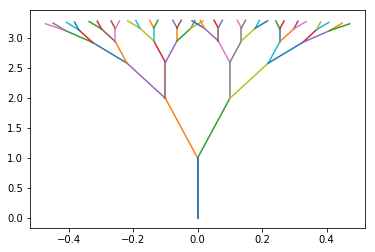

In [25]:
kavin.tree(5,0.1,0.6,1,True)

In [26]:
kavin.tree(1,0.1,0.6,1,False)

In [31]:

#from matplotlib import pyplot as plt
import timeit 

initial=tree_of_life()

def time_to_generate_tree(class_name,generations):
    count = 1
    iteration = 1
    k1=[]
    k2=[]
    while count < (generations+1):
        
        time =class_name.tree(count,0.1,0.6,1,False)  
        x = timeit.Timer("time").timeit()
        iteration *=2
        k1.append(x)
        k2.append(iteration)
        count+=1
    return k1,k2

T,itera = time_to_generate_tree(initial,5)
print(T)
print(itera)
Time=T
iterations=itera
#plt.plot(iterations,Time)

#def plot_time(class_name, generations, title=None):
 #   T,itera = time_to_generate_tree(class_name,generations)
  #  print(T)
   # print(itera)
    #plt.plot(itera,T)
    #plt.ylim(bottom=0) 
    #plt.ylabel('seconds')
    #plt.xlabel('Number of iterations')
    #plt.title(title)
    #plt.savefig('perf_plot.png')

#plot_time(initial,6,'Number of iterations agaist time')

[0.03208589299998721, 0.025018019999947683, 0.021296350000000075, 0.020443585000009534, 0.022383496000031755]
[2, 4, 8, 16, 32]


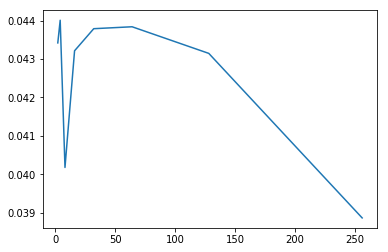

In [5]:
Time=T
iterations=itera
plt.plot(iterations,Time)

Adding argparse

In [18]:
#%%writefile tree.py

from argparse import ArgumentParser
from math import sin, cos
from matplotlib import pyplot as plt

class tree_of_life(object):
    
    def __init__(self,generation=5,change_in_angle=0.1,length_rescale=0.6,length=1):
        self.generation=generation
        self.change_in_angle=change_in_angle
        self.length_rescale=length_rescale
        self.length=length
        self.initial_point=[[0,1,0]]
        
    def plots(self,x,y,new_point):
        plt.plot([0,0],[0,1])
        plt.plot([x, new_point[-2][0]],[y, new_point[-2][1]])
        plt.plot([x, new_point[-1][0]],[y, new_point[-1][1]])
        plt.savefig('tree.png')

    def new_points(self,x,y,angle,length,change_in_angle,new_point):        
        new_point.append([x+length*sin(angle-change_in_angle), y+length*cos(angle-change_in_angle), 
        angle-change_in_angle])
        new_point.append([x+length*sin(angle+change_in_angle), y+length*cos(angle+change_in_angle), 
        angle+change_in_angle])

    def tree_branch(self,initial_point,length,change_in_angle,new_point,plot=True):
        for j in initial_point:
            x,y,angle=j
            self.new_points(x,y,angle,length,change_in_angle,new_point) 
            if plot:
                self.plots(x,y,new_point)

    def tree(self,generation=5,change_in_angle=0.1,length_rescale=0.6,length=1,plot=True):        
        initial_point=self.initial_point
        for i in range(generation):
            new_point=[]
            self.tree_branch(initial_point,length,change_in_angle,new_point,plot=True)
            initial_point=new_point
            length*=length_rescale
            
if __name__ == "__main__":
    parser = ArgumentParser(description="The tree of life")
    parser.add_argument('generation', nargs='?', const=5, type=int)
    parser.add_argument('change_in_angle', nargs='?', const=0.1, type=int)
    parser.add_argument('length_rescale', nargs='?', const=0.6, type=int)
    parser.add_argument('length', nargs='?', const=1, type=int)
    parser.add_argument('--plot', action = "store_true")
    arguments = parser.parse_args()
    #nargs='?' allows to use a default value if no arguments are given and const gives the dafault
    #value and type make sure the input are integers
    
    initial=tree_of_life(arguments.generation,arguments.change_in_angle,arguments.length_rescale,arguments.length)
    initial.tree(False)
    
    if arguments.plot:
        initial.tree()

usage: ipykernel_launcher.py [-h] [--plot]
                             [generation] [change_in_angle] [length_rescale]
                             [length]
ipykernel_launcher.py: error: argument generation: invalid int value: 'C:\\Users\\Kavin\\AppData\\Roaming\\jupyter\\runtime\\kernel-dc91bde1-595c-488c-b413-047068e11724.json'


SystemExit: 2

C:\Users\Kavin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
!python tree.py --plot

In [2]:
import numpy as np
init = np.array([[0],[1],[0]])

In [3]:
x,y,angle = init

In [4]:
x

array([0])

In [5]:
type(1.0)

float